In [188]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [189]:
df = pd.read_csv('phishing_data.csv')
df.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [190]:
data = df.copy()

In [191]:
df.shape

(11055, 31)

In [192]:
df.isnull().sum()

having_ip_address             0
url_length                    0
shortining_service            0
having_at_symbol              0
double_slash_redirecting      0
prefix_suffix                 0
having_sub_domain             0
sslfinal_state                0
domain_registration_length    0
favicon                       0
port                          0
https_token                   0
request_url                   0
url_of_anchor                 0
links_in_tags                 0
sfh                           0
submitting_to_email           0
abnormal_url                  0
redirect                      0
on_mouseover                  0
rightclick                    0
popupwindow                   0
iframe                        0
age_of_domain                 0
dnsrecord                     0
web_traffic                   0
page_rank                     0
google_index                  0
links_pointing_to_page        0
statistical_report            0
result                        0
dtype: i

In [193]:
print("row_duplicated:",df.duplicated().sum())
print("column_duplicated:",df.T.duplicated().sum())

row_duplicated: 5206
column_duplicated: 0


In [194]:
df = df.drop_duplicates()
df

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1


In [195]:
df.shape

(5849, 31)

In [196]:
for col in df.columns:
    print('-', col, ':', df[col].dtype)

- having_ip_address : int64
- url_length : int64
- shortining_service : int64
- having_at_symbol : int64
- double_slash_redirecting : int64
- prefix_suffix : int64
- having_sub_domain : int64
- sslfinal_state : int64
- domain_registration_length : int64
- favicon : int64
- port : int64
- https_token : int64
- request_url : int64
- url_of_anchor : int64
- links_in_tags : int64
- sfh : int64
- submitting_to_email : int64
- abnormal_url : int64
- redirect : int64
- on_mouseover : int64
- rightclick : int64
- popupwindow : int64
- iframe : int64
- age_of_domain : int64
- dnsrecord : int64
- web_traffic : int64
- page_rank : int64
- google_index : int64
- links_pointing_to_page : int64
- statistical_report : int64
- result : int64


In [197]:
for col in df.columns:
    print(f"{col}:")
    print(df[col].unique())

having_ip_address:
[-1  1]
url_length:
[ 1  0 -1]
shortining_service:
[ 1 -1]
having_at_symbol:
[ 1 -1]
double_slash_redirecting:
[-1  1]
prefix_suffix:
[-1  1]
having_sub_domain:
[-1  0  1]
sslfinal_state:
[-1  1  0]
domain_registration_length:
[-1  1]
favicon:
[ 1 -1]
port:
[ 1 -1]
https_token:
[-1  1]
request_url:
[ 1 -1]
url_of_anchor:
[-1  0  1]
links_in_tags:
[ 1 -1  0]
sfh:
[-1  1  0]
submitting_to_email:
[-1  1]
abnormal_url:
[-1  1]
redirect:
[0 1]
on_mouseover:
[ 1 -1]
rightclick:
[ 1 -1]
popupwindow:
[ 1 -1]
iframe:
[ 1 -1]
age_of_domain:
[-1  1]
dnsrecord:
[-1  1]
web_traffic:
[-1  0  1]
page_rank:
[-1  1]
google_index:
[ 1 -1]
links_pointing_to_page:
[ 1  0 -1]
statistical_report:
[-1  1]
result:
[-1  1]


In [198]:
df['result'] = df['result'].replace(-1,0)

In [199]:
x = df.drop('result',axis=1)
y = df['result']

In [200]:
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score

In [201]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [202]:
models = {
                "Random Forest": RandomForestClassifier(random_state=42),
                "Decision Tree": DecisionTreeClassifier(),
                "Gradient Boosting": GradientBoostingClassifier(),
                "LogisticRegression": LogisticRegression(),
                #"XGBRegressor": XGBRegressor(n_estimators=100),
                #"CatBoosting Regressor": CatBoostRegressor(verbose=False),
                "AdaBoost": AdaBoostClassifier(),
                'KNeighborsClassifier':KNeighborsClassifier()
            }
     

In [203]:
model_report = {}

for model_name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    acc = accuracy_score(ytest, y_pred)
    fe = f1_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    model_report[model_name] = acc
    print(f"{model_name} Results:")
    print("Accuracy:", round(acc, 2))
    print("f1_score:", round(fe, 2))
    print("precision_score:", round(precision, 2))
    print('classification_report:')
    print(classification_report(ytest, y_pred))
print("Model Comparison Report:")
print(model_report)

Random Forest Results:
Accuracy: 0.95
f1_score: 0.95
precision_score: 0.94
classification_report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       620
           1       0.94      0.95      0.95       550

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170

Decision Tree Results:
Accuracy: 0.93
f1_score: 0.92
precision_score: 0.93
classification_report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       620
           1       0.93      0.91      0.92       550

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170

Gradient Boosting Results:
Accuracy: 0.94
f1_score: 0.94
precision_score: 0.93
classification_report:
              precision    recall  f1-score   su

In [ ]:
model = RandomForestClassifier(random_state=42).fit(xtrain,ytrain)

feature_importance = pd.DataFrame({
    'Feature': xtrain.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


                       Feature  Importance
7               sslfinal_state    0.306561
13               url_of_anchor    0.249265
6            having_sub_domain    0.063476
5                prefix_suffix    0.051646
25                 web_traffic    0.050646
14               links_in_tags    0.042961
15                         sfh    0.032933
28      links_pointing_to_page    0.020819
12                 request_url    0.018512
8   domain_registration_length    0.016843
23               age_of_domain    0.015301
0            having_ip_address    0.014857
26                   page_rank    0.012610
27                google_index    0.012273
24                   dnsrecord    0.010590
1                   url_length    0.009659
11                 https_token    0.007211
29          statistical_report    0.006809
3             having_at_symbol    0.006559
18                    redirect    0.006440
16         submitting_to_email    0.006195
21                 popupwindow    0.006046
2          

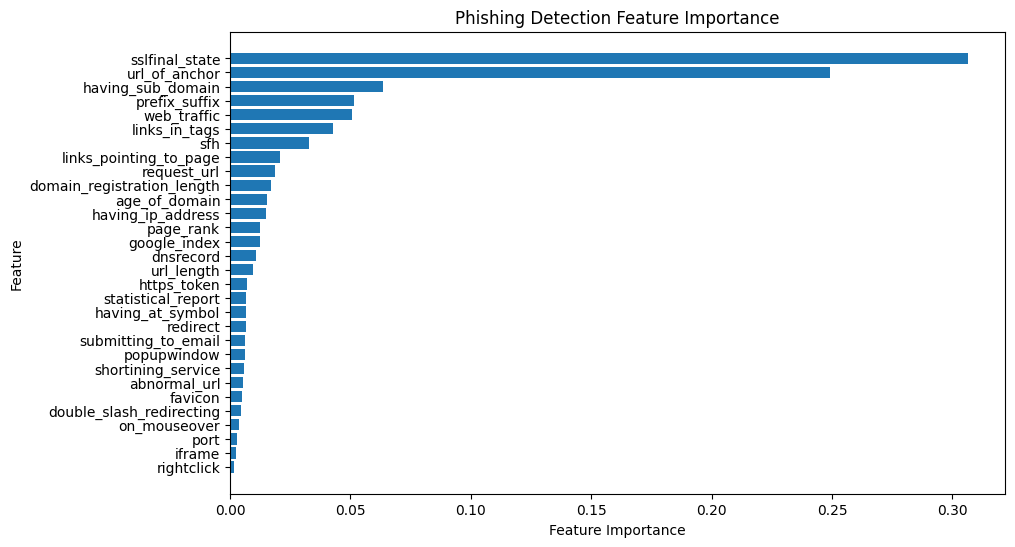

In [206]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Phishing Detection Feature Importance")
plt.gca().invert_yaxis() 
plt.show()


In [207]:
top_features = feature_importance['Feature'][:17]
top_features 

7                 sslfinal_state
13                 url_of_anchor
6              having_sub_domain
5                  prefix_suffix
25                   web_traffic
14                 links_in_tags
15                           sfh
28        links_pointing_to_page
12                   request_url
8     domain_registration_length
23                 age_of_domain
0              having_ip_address
26                     page_rank
27                  google_index
24                     dnsrecord
1                     url_length
11                   https_token
Name: Feature, dtype: object

In [208]:
x.shape

(5849, 30)

In [209]:
top_features = feature_importance['Feature'].head(16)
X = x[top_features]
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

model_report = {}
for model_name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    acc = accuracy_score(ytest, y_pred)
    fe = f1_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    model_report[model_name] = acc
    print(f"{model_name} Results:")
    print("Accuracy:", round(acc, 2))
    print("f1_score:", round(fe, 2))
    print("precision_score:", round(precision, 2))
    # print('classification_report:')
    # print(classification_report(ytest, y_pred))
print("Model Comparison Report:")
print(model_report)

Random Forest Results:
Accuracy: 0.94
f1_score: 0.94
precision_score: 0.93
Decision Tree Results:
Accuracy: 0.93
f1_score: 0.93
precision_score: 0.94
Gradient Boosting Results:
Accuracy: 0.94
f1_score: 0.94
precision_score: 0.94
LogisticRegression Results:
Accuracy: 0.92
f1_score: 0.92
precision_score: 0.91
AdaBoost Results:
Accuracy: 0.93
f1_score: 0.93
precision_score: 0.92
KNeighborsClassifier Results:
Accuracy: 0.92
f1_score: 0.91
precision_score: 0.92
Model Comparison Report:
{'Random Forest': 0.941025641025641, 'Decision Tree': 0.9307692307692308, 'Gradient Boosting': 0.9444444444444444, 'LogisticRegression': 0.923931623931624, 'AdaBoost': 0.9316239316239316, 'KNeighborsClassifier': 0.917094017094017}


In [210]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Suppose top_features = ['f1','f2','f3','f4','f5']
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), top_features)
])
model_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

Top 17 feature and grid_searchCV

In [220]:
def feature_importance_select(data, top_n=17):
    is_dataframe = isinstance(data, pd.DataFrame)
    if is_dataframe:
        X = data.iloc[:, :-1]
        y = data.iloc[:, -1]
        feature_names = np.array(X.columns)
    else:
        X = data[:, :-1]
        y = data[:, -1]
        feature_names = np.array([f"f{i}" for i in range(X.shape[1])])  
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)[::-1] ## Sort indices by importance descending
    top_features_idx = sorted_idx[:top_n]
    if is_dataframe: ## Return same type as input
        top_features = feature_names[top_features_idx]
        x = X[top_features]
        return x,y
    else:
        x = X[:,top_features]
        return x,y ## (n_samples, top_n_features)


In [221]:
x,y = feature_importance_select(data)

In [222]:
x.shape
y.shape

(11055,)

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2,3]
}

param_grid_rf = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

model_params = {
    'DecisionTree': [DecisionTreeClassifier(), param_grid_dt],
    'RandomForest': [RandomForestClassifier(), param_grid_rf]
}


In [225]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

model_report = {}
for model_name, (model, param_grid) in model_params.items():
    print(f"\nRunning GridSearchCV for {model_name}...")

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid.fit(xtrain, ytrain)
    
    best_model = grid.best_estimator_
    best_score = grid.best_score_
    y_pred = best_model.predict(xtest)
    acc = accuracy_score(ytest, y_pred)
    report = classification_report(ytest, y_pred)
    # Store results
    model_report[model_name] = {
        "best_params": grid.best_params_,
        "cv_score": best_score,
        "test_accuracy": acc,
        "classification_report": report
    }
    
    print(model_report)


Running GridSearchCV for DecisionTree...
Fitting 3 folds for each of 135 candidates, totalling 405 fits


{'DecisionTree': {'best_params': {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}, 'cv_score': np.float64(0.9559023066485753), 'test_accuracy': 0.9601990049751243, 'classification_report': '              precision    recall  f1-score   support\n\n          -1       0.96      0.95      0.95       956\n           1       0.96      0.97      0.97      1255\n\n    accuracy                           0.96      2211\n   macro avg       0.96      0.96      0.96      2211\nweighted avg       0.96      0.96      0.96      2211\n'}}

Running GridSearchCV for RandomForest...
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
{'DecisionTree': {'best_params': {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}, 'cv_score': np.float64(0.9559023066485753), 'test_accuracy': 0.9601990049751243, 'classification_report': '              precision    recall  f1-score   support\n\n          -1       0.96      0.95  

In [226]:
print(f"\n{model_name} Best Params: {grid.best_params_}")
print(f"{model_name} CV Accuracy: {best_score:.4f}")
print(f"{model_name} Test Accuracy: {acc:.4f}")
print(f"{model_name} Classification Report:\n{report}")


RandomForest Best Params: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
RandomForest CV Accuracy: 0.9662
RandomForest Test Accuracy: 0.9643
RandomForest Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       956
           1       0.97      0.97      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

